# Imports

In [1]:
import pandas as pd
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
%matplotlib inline

# Load File

In [3]:
filepath = '~/homebound/kaggle/kobe-bryant/data/raw/data.csv'

In [29]:
data = pd.read_csv(filepath,parse_dates=['game_date'])

In [32]:
data.to_csv('~/homebound/kaggle/kobe-bryant/data/processed/data.csv')

# Data Exploration

In [30]:
data.sample(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
2183,Jump Shot,Jump Shot,2,20100525,33.9513,150,93,-118.1198,11,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2002-01-14,LAL vs. MEM,MEM,2184
7280,Jump Shot,Jump Shot,135,20400994,33.8703,184,174,-118.0858,7,2,...,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2005-03-22,LAL @ UTA,UTA,7281
2430,Running Jump Shot,Jump Shot,42,20100691,34.0463,-105,-2,-118.3748,6,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2002-02-06,LAL vs. CHI,CHI,2431
18258,Turnaround Jump Shot,Jump Shot,59,21100109,34.0373,136,7,-118.1338,5,1,...,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2012-01-06,LAL vs. GSW,GSW,18259
26030,Jump Shot,Jump Shot,259,29901039,33.9053,100,139,-118.1698,8,3,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-03-31,LAL vs. PHI,PHI,26031
27069,Jump Shot,Jump Shot,498,40200173,33.8383,146,206,-118.1238,0,4,...,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2003-04-24,LAL vs. MIN,MIN,27070
12100,Layup Shot,Layup,299,20700497,34.0443,0,0,-118.2698,9,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2008-01-06,LAL vs. IND,IND,12101
6967,Jump Shot,Jump Shot,96,20400799,33.8473,-154,197,-118.4238,2,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2005-02-23,LAL @ POR,POR,6968
28407,Jump Shot,Jump Shot,243,40700402,33.8453,-3,199,-118.2728,9,3,...,2PT Field Goal,Center(C),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2008-06-08,LAL @ BOS,BOS,28408
11795,Jump Shot,Jump Shot,271,20700249,33.4523,159,592,-118.1108,0,2,...,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,1610612747,Los Angeles Lakers,2007-12-02,LAL vs. ORL,ORL,11796


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   action_type         30697 non-null  object        
 1   combined_shot_type  30697 non-null  object        
 2   game_event_id       30697 non-null  int64         
 3   game_id             30697 non-null  int64         
 4   lat                 30697 non-null  float64       
 5   loc_x               30697 non-null  int64         
 6   loc_y               30697 non-null  int64         
 7   lon                 30697 non-null  float64       
 8   minutes_remaining   30697 non-null  int64         
 9   period              30697 non-null  int64         
 10  playoffs            30697 non-null  int64         
 11  season              30697 non-null  object        
 12  seconds_remaining   30697 non-null  int64         
 13  shot_distance       30697 non-null  int64     

### Shot Made Flag

In [7]:
# ~ 16% of the shots don't have any info about whether the shot was made or not; drop those rows
data['shot_made_flag'].describe()

count    25697.000000
mean         0.446161
std          0.497103
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: shot_made_flag, dtype: float64

<AxesSubplot:xlabel='shot_made_flag', ylabel='count'>

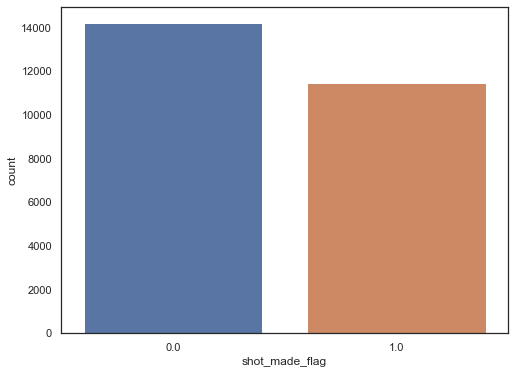

In [8]:
# Kobe Made 44.6% of his shots
plt.figure(figsize=(8, 6))
sns.countplot(x='shot_made_flag', data=data)

In [12]:
data = data[data['shot_made_flag'].notna()]

# Shot Zone Range

In [13]:
data['shot_zone_range'].describe()

count               25697
unique                  5
top       Less Than 8 ft.
freq                 7857
Name: shot_zone_range, dtype: object

In [14]:
data.groupby('shot_zone_range')['shot_made_flag'].count().reset_index()

,shot_zone_range,shot_made_flag
0,16-24 ft.,6907
1,24+ ft.,5281
2,8-16 ft.,5580
3,Back Court Shot,72
4,Less Than 8 ft.,7857


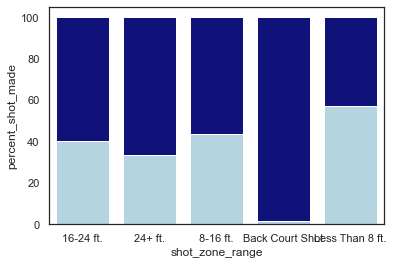

In [22]:
total = data.groupby('shot_zone_range')['shot_made_flag'].count().reset_index()
shot_made = data[data['shot_made_flag']==1].groupby('shot_zone_range')['shot_made_flag'].count().reset_index()
shot_made['percent_shot_made'] = [i / j * 100 for i,j in zip(shot_made['shot_made_flag'], total['shot_made_flag'])]
total['percent_shot_made'] = [i / j * 100 for i,j in zip(total['shot_made_flag'], total['shot_made_flag'])]

bar1 = sns.barplot(x="shot_zone_range",  y="percent_shot_made", data=total, color='darkblue')
bar2 = sns.barplot(x="shot_zone_range", y="percent_shot_made", data=shot_made, color='lightblue')

# Playoffs

In [18]:
data['playoffs'].describe()

count    25697.000000
mean         0.146243
std          0.353356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: playoffs, dtype: float64

In [19]:
data.groupby('playoffs')['shot_made_flag'].count().reset_index()

,playoffs,shot_made_flag
0,0,21939
1,1,3758


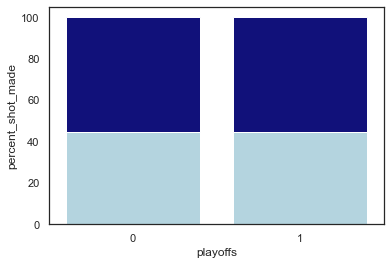

In [21]:
total = data.groupby('playoffs')['shot_made_flag'].count().reset_index()
shot_made = data[data['shot_made_flag']==1].groupby('playoffs')['shot_made_flag'].count().reset_index()
shot_made['percent_shot_made'] = [i / j * 100 for i,j in zip(shot_made['shot_made_flag'], total['shot_made_flag'])]
total['percent_shot_made'] = [i / j * 100 for i,j in zip(total['shot_made_flag'], total['shot_made_flag'])]

bar1 = sns.barplot(x="playoffs",  y="percent_shot_made", data=total, color='darkblue')
bar2 = sns.barplot(x="playoffs", y="percent_shot_made", data=shot_made, color='lightblue')

### Period

In [23]:
data['period'].describe()

count    25697.000000
mean         2.520800
std          1.151626
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: period, dtype: float64

In [24]:
data.groupby('period')['shot_made_flag'].count().reset_index()

,period,shot_made_flag
0,1,6700
1,2,5635
2,3,7002
3,4,6043
4,5,280
5,6,30
6,7,7


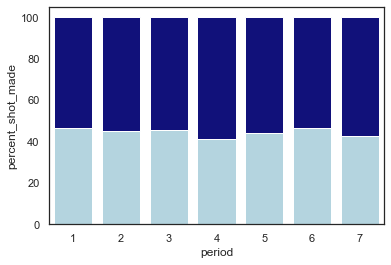

In [25]:
total = data.groupby('period')['shot_made_flag'].count().reset_index()
shot_made = data[data['shot_made_flag']==1].groupby('period')['shot_made_flag'].count().reset_index()
shot_made['percent_shot_made'] = [i / j * 100 for i,j in zip(shot_made['shot_made_flag'], total['shot_made_flag'])]
total['percent_shot_made'] = [i / j * 100 for i,j in zip(total['shot_made_flag'], total['shot_made_flag'])]

bar1 = sns.barplot(x="period",  y="percent_shot_made", data=total, color='darkblue')
bar2 = sns.barplot(x="period", y="percent_shot_made", data=shot_made, color='lightblue')

### Season

In [26]:
data['season'].describe()

count       25697
unique         20
top       2005-06
freq         1924
Name: season, dtype: object

In [27]:
data.groupby('season')['shot_made_flag'].count().reset_index()

,season,shot_made_flag
0,1996-97,383
1,1997-98,810
2,1998-99,765
3,1999-00,1312
4,2000-01,1575
5,2001-02,1708
6,2002-03,1852
7,2003-04,1371
8,2004-05,1127
9,2005-06,1924


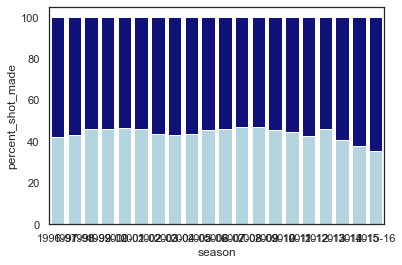

In [28]:
total = data.groupby('season')['shot_made_flag'].count().reset_index()
shot_made = data[data['shot_made_flag']==1].groupby('season')['shot_made_flag'].count().reset_index()
shot_made['percent_shot_made'] = [i / j * 100 for i,j in zip(shot_made['shot_made_flag'], total['shot_made_flag'])]
total['percent_shot_made'] = [i / j * 100 for i,j in zip(total['shot_made_flag'], total['shot_made_flag'])]

bar1 = sns.barplot(x="season",  y="percent_shot_made", data=total, color='darkblue')
bar2 = sns.barplot(x="season", y="percent_shot_made", data=shot_made, color='lightblue')

In [ ]:
# OHE

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train, test = train_test_split(data, test_size=0.2)


In [37]:
    target_col = ['shot_made_flag']
    feature_cols = ['combined_shot_type',
                    'period',
                    'season',
                    'shot_zone_basic',
                    'shot_zone_range'
                    ]

In [49]:
d1=pd.get_dummies(train[feature_cols])


In [50]:
t1=pd.get_dummies(test[feature_cols])


In [54]:
list(set(list(d1.columns)).difference(set(list(t1.columns))))

[]

In [55]:
list(set(list(t1.columns)).difference(set(list(d1.columns))))

[]

In [52]:
t1.columns

Index(['period', 'combined_shot_type_Bank Shot', 'combined_shot_type_Dunk',
       'combined_shot_type_Hook Shot', 'combined_shot_type_Jump Shot',
       'combined_shot_type_Layup', 'combined_shot_type_Tip Shot',
       'season_1996-97', 'season_1997-98', 'season_1998-99', 'season_1999-00',
       'season_2000-01', 'season_2001-02', 'season_2002-03', 'season_2003-04',
       'season_2004-05', 'season_2005-06', 'season_2006-07', 'season_2007-08',
       'season_2008-09', 'season_2009-10', 'season_2010-11', 'season_2011-12',
       'season_2012-13', 'season_2013-14', 'season_2014-15', 'season_2015-16',
       'shot_zone_basic_Above the Break 3', 'shot_zone_basic_Backcourt',
       'shot_zone_basic_In The Paint (Non-RA)',
       'shot_zone_basic_Left Corner 3', 'shot_zone_basic_Mid-Range',
       'shot_zone_basic_Restricted Area', 'shot_zone_basic_Right Corner 3',
       'shot_zone_range_16-24 ft.', 'shot_zone_range_24+ ft.',
       'shot_zone_range_8-16 ft.', 'shot_zone_range_Back Court 

In [39]:
df_train_features=pd.get_dummies[feature_cols]

In [40]:
df_test_features=test[feature_cols]

In [41]:
enc = OneHotEncoder()
enc.fit(df_train_features)

OneHotEncoder()

In [44]:
d1=enc.transform(df_train_features)
t1=enc.transform(df_test_features)